Dataset loaded successfully!
Checking for missing values...
No missing values found.
Training set size: 16, Test set size: 4
Random Forest model trained successfully!
Random Forest - Mean Absolute Error: 4.465233333333331
Random Forest - Mean Squared Error: 24.522197658904275
Epoch 1/100


D:\steam\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 972ms/step - loss: 874.2479 - val_loss: 872.1689
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 872.0409 - val_loss: 870.1130
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 869.8637 - val_loss: 868.0557
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 867.6935 - val_loss: 866.0029
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 865.5121 - val_loss: 863.9561
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 863.2975 - val_loss: 861.8460
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 861.0443 - val_loss: 859.7935
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 858.8506 - val_loss: 857.7554
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 856.7004 - val_loss: 855.7258
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 854.5901 - val_loss: 853.6647
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 852.4973 - val_loss: 851.6251
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

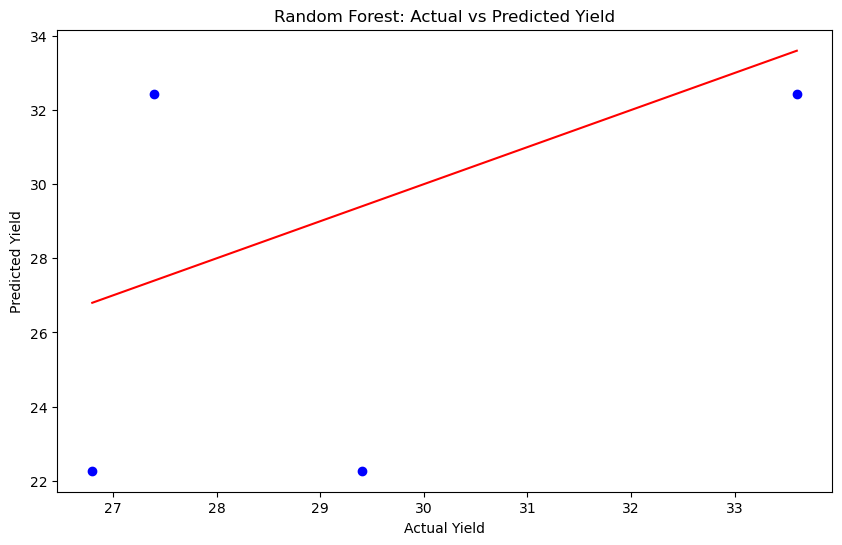

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

try:
    data = pd.read_csv("crop_yield.csv")
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Check for missing values and handle them
print("Checking for missing values...")
missing_values = data.isnull().sum()
if missing_values.any():
    print(f"Missing values found, filling with mean: {missing_values[missing_values > 0]}")
    data.fillna(data.mean(), inplace=True)
else:
    print("No missing values found.")

# Ensure that the 'Yield' column is present
if 'Yield' not in data.columns:
    print("Error: 'Yield' column is missing in the dataset.")
    exit()

# If there are categorical columns, encode them (for example, crop type)
data = pd.get_dummies(data, drop_first=True)

# Normalize the data (optional but recommended)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Yield', axis=1))  # assuming 'Yield' is the target column

# Split data into features (X) and target (y)
X = scaled_data
y = data['Yield']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# Train a Random Forest Regressor model
try:
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    print("Random Forest model trained successfully!")
except Exception as e:
    print(f"Error training Random Forest model: {e}")
    exit()

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest - Mean Absolute Error: {mae}")
print(f"Random Forest - Mean Squared Error: {mse}")

# Neural Network model (optional)
try:
    nn_model = Sequential()
    nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    nn_model.add(Dense(32, activation='relu'))
    nn_model.add(Dense(1))  # Output layer (since it's a regression problem)

    nn_model.compile(optimizer='adam', loss='mean_squared_error')
    nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
    print("Neural Network model trained successfully!")
except Exception as e:
    print(f"Error training Neural Network model: {e}")
    exit()

# Predict with the neural network model
y_pred_nn = nn_model.predict(X_test)

# Evaluate the Neural Network model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Neural Network - MAE: {mae_nn}")
print(f"Neural Network - MSE: {mse_nn}")

# Visualize the Random Forest model's predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Random Forest: Actual vs Predicted Yield')
plt.show()
